# Solutions

1. [Tidy Data with melt](#1.-Tidy-Data-with-melt)
1. [Reshaping by Pivoting](#2.-Reshaping-by-Pivoting)
1. [Regular Expressions Part 1](#3.-Regular-Expressions-Part-1)
1. [Regular Expressions Part 2](#4.-Regular-Expressions-Part-2)
1. [Regular Expressions Part 3](#5.-Regular-Expressions-Part-3)
1. [Common Messy Datasets](#6.-Common-messy-datasets)
1. [Why Tidy Data](#7.-Why-Tidy-Data)


# 1. Tidy Data with `melt`

In [2]:
import pandas as pd
import numpy as np
pd.options.display.max_columns = 40

In [3]:
movie = pd.read_csv('../data/movie.csv')
movie.head()

,title,year,color,content_rating,duration,director_name,director_fb,actor1,actor1_fb,actor2,actor2_fb,actor3,actor3_fb,gross,genres,num_reviews,num_voted_users,plot_keywords,language,country,budget,imdb_score
0,Avatar,2009.0,Color,PG-13,178.0,James Cameron,0.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,723.0,886204,avatar|future|marine|native|paraplegic,English,USA,237000000.0,7.9
1,Pirates of the Caribbean: At World's End,2007.0,Color,PG-13,169.0,Gore Verbinski,563.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,309404152.0,Action|Adventure|Fantasy,302.0,471220,goddess|marriage ceremony|marriage proposal|pi...,English,USA,300000000.0,7.1
2,Spectre,2015.0,Color,PG-13,148.0,Sam Mendes,0.0,Christoph Waltz,11000.0,Rory Kinnear,393.0,Stephanie Sigman,161.0,200074175.0,Action|Adventure|Thriller,602.0,275868,bomb|espionage|sequel|spy|terrorist,English,UK,245000000.0,6.8
3,The Dark Knight Rises,2012.0,Color,PG-13,164.0,Christopher Nolan,22000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,448130642.0,Action|Thriller,813.0,1144337,deception|imprisonment|lawlessness|police offi...,English,USA,250000000.0,8.5
4,Star Wars: Episode VII - The Force Awakens,NaN,NaN,NaN,NaN,Doug Walker,131.0,Doug Walker,131.0,Rob Walker,12.0,NaN,NaN,NaN,Documentary,NaN,8,NaN,NaN,NaN,NaN,7.1


### Problem 1
<span  style="color:green; font-size:16px">In this problem, we will only look at the title column and the actor name columns. Restructure the dataset so that there are only three variables - the title of the movie, the actor number (1, 2, or 3), and the actor name. Sort the result by title and output the first 20 rows.</span>

In [4]:
actor_tidy = movie.melt(id_vars='title', 
                        value_vars=['actor1', 'actor2', 'actor3'], 
                        var_name='Actor Number',
                        value_name='Actor Name').sort_values('title')
actor_tidy.head(20)

,title,Actor Number,Actor Name
14181,#Horror,actor3,Lydia Hearst
9265,#Horror,actor2,Balthazar Getty
4349,#Horror,actor1,Timothy Hutton
13461,10 Cloverfield Lane,actor3,Sumalee Montano
8545,10 Cloverfield Lane,actor2,John Gallagher Jr.
3629,10 Cloverfield Lane,actor1,Bradley Cooper
7880,10 Days in a Madhouse,actor2,Kelly LeBrock
12796,10 Days in a Madhouse,actor3,Alexandra Callas
2964,10 Days in a Madhouse,actor1,Christopher Lambert
7715,10 Things I Hate About You,actor2,Heath Ledger


### Problem 2
<span  style="color:green; font-size:16px">Using the original movie dataset (and keeping its structure), attempt to count the total appearances of each actor in the dataset regardless whether they are 1, 2, or 3. Then repeat this task with your tidy dataset.</span>

We have not covered how to do the first part of the question. It becomes very easy with tidy data.

In [5]:
actor_ct = actor_tidy['Actor Name'].value_counts()
actor_ct.head()

Robert De Niro    53
Morgan Freeman    43
Bruce Willis      38
Matt Damon        37
Johnny Depp       36
Name: Actor Name, dtype: int64

Advanced Pandas for first part. This is a pandas trick that uses the **`add`** method to add Series together:

In [6]:
vc1 = movie['actor1'].value_counts()
vc2 = movie['actor2'].value_counts()
vc3 = movie['actor3'].value_counts()

In [8]:
actor_ct2 = vc1.add(vc2, fill_value=0) \
               .add(vc3, fill_value=0) \
               .astype(int) \
               .sort_values(ascending=False)
actor_ct2.head()

Robert De Niro    53
Morgan Freeman    43
Bruce Willis      38
Matt Damon        37
Steve Buscemi     36
dtype: int64

### Problem 3
<span  style="color:green; font-size:16px">Tidy the dataset in the **`tidy/employee_messy1.csv`** file. It contains the count of all employees by race and gender.</span>

In [9]:
em = pd.read_csv('../data/tidy/employee_messy1.csv')
em

,RACE,Female,Male
0,American Indian or Alaskan Native,6,5
1,Asian/Pacific Islander,30,77
2,Black or African American,305,395
3,Hispanic/Latino,139,341
4,Others,1,1
5,White,108,557


In [10]:
em.melt(id_vars='RACE', value_vars=['Female', 'Male'], 
        var_name='GENDER', value_name='COUNT')

,RACE,GENDER,COUNT
0,American Indian or Alaskan Native,Female,6
1,Asian/Pacific Islander,Female,30
2,Black or African American,Female,305
3,Hispanic/Latino,Female,139
4,Others,Female,1
5,White,Female,108
6,American Indian or Alaskan Native,Male,5
7,Asian/Pacific Islander,Male,77
8,Black or African American,Male,395
9,Hispanic/Latino,Male,341


### Problem 4
<span  style="color:green; font-size:16px">Tidy the dataset in the **`tidy/employee_messy2.csv`** file. It contains the count of all employees by department, race and gender.</span>

In [11]:
em2 = pd.read_csv('../data/tidy/employee_messy2.csv')
em2.head()

,DEPARTMENT,GENDER,Asian/Pacific Islander,Black or African American,Hispanic/Latino,White
0,Health & Human Services,Female,6,43,22,6
1,Health & Human Services,Male,5,10,5,6
2,Houston Fire Department (HFD),Female,0,7,8,6
3,Houston Fire Department (HFD),Male,1,62,91,203
4,Houston Police Department-HPD,Female,6,76,35,35


In [13]:
em2.melt(id_vars=['DEPARTMENT', 'GENDER'], 
         var_name='RACE', 
         value_name='COUNT').head(10)

,DEPARTMENT,GENDER,RACE,COUNT
0,Health & Human Services,Female,Asian/Pacific Islander,6
1,Health & Human Services,Male,Asian/Pacific Islander,5
2,Houston Fire Department (HFD),Female,Asian/Pacific Islander,0
3,Houston Fire Department (HFD),Male,Asian/Pacific Islander,1
4,Houston Police Department-HPD,Female,Asian/Pacific Islander,6
5,Houston Police Department-HPD,Male,Asian/Pacific Islander,33
6,Public Works & Engineering-PWE,Female,Asian/Pacific Islander,4
7,Public Works & Engineering-PWE,Male,Asian/Pacific Islander,25
8,Health & Human Services,Female,Black or African American,43
9,Health & Human Services,Male,Black or African American,10


### Problem 5
<span  style="color:green; font-size:16px">Tidy the dataset in the **`tidy/employee_salary_stats.csv`** file. Save the tidy dataset to a variable and then select all the median salaries. The select all the median salaries with the original 'messy' dataset. Which one is easier to read summary statistics from?</span>

In [14]:
em_stats = pd.read_csv('../data/tidy/employee_salary_stats.csv')
em_stats

,RACE,GENDER,min,mean,median,max
0,American Indian or Alaskan Native,Female,26125,60238,58855,98536
1,American Indian or Alaskan Native,Male,26125,60305,60347,81239
2,Asian/Pacific Islander,Female,26125,63226,57227,130416
3,Asian/Pacific Islander,Male,27914,61033,55461,163228
4,Black or African American,Female,24960,48915,44491,150416
5,Black or African American,Male,26125,51082,46486,275000
6,Hispanic/Latino,Female,26125,46503,43087,126115
7,Hispanic/Latino,Male,26104,54782,54090,165216
8,Others,Female,63785,63785,63785,63785
9,Others,Male,38771,38771,38771,38771


In [15]:
df_tidy = em_stats.melt(id_vars=['RACE', 'GENDER'], 
                        var_name='Statistic', 
                        value_name='Salary Value')
df_tidy.head(10)

,RACE,GENDER,Statistic,Salary Value
0,American Indian or Alaskan Native,Female,min,26125
1,American Indian or Alaskan Native,Male,min,26125
2,Asian/Pacific Islander,Female,min,26125
3,Asian/Pacific Islander,Male,min,27914
4,Black or African American,Female,min,24960
5,Black or African American,Male,min,26125
6,Hispanic/Latino,Female,min,26125
7,Hispanic/Latino,Male,min,26104
8,Others,Female,min,63785
9,Others,Male,min,38771


In [16]:
filt = df_tidy['Statistic'] == 'median'
df_tidy[filt]

,RACE,GENDER,Statistic,Salary Value
24,American Indian or Alaskan Native,Female,median,58855
25,American Indian or Alaskan Native,Male,median,60347
26,Asian/Pacific Islander,Female,median,57227
27,Asian/Pacific Islander,Male,median,55461
28,Black or African American,Female,median,44491
29,Black or African American,Male,median,46486
30,Hispanic/Latino,Female,median,43087
31,Hispanic/Latino,Male,median,54090
32,Others,Female,median,63785
33,Others,Male,median,38771


In [17]:
cols = ['RACE', 'GENDER', 'median']
em_stats[cols]

,RACE,GENDER,median
0,American Indian or Alaskan Native,Female,58855
1,American Indian or Alaskan Native,Male,60347
2,Asian/Pacific Islander,Female,57227
3,Asian/Pacific Islander,Male,55461
4,Black or African American,Female,44491
5,Black or African American,Male,46486
6,Hispanic/Latino,Female,43087
7,Hispanic/Latino,Male,54090
8,Others,Female,63785
9,Others,Male,38771


The messy dataset is probably easier, as it shows all the aggregated statistics for each race and gender in a single row. Aggregated values are generally easier to read as "messy" datasets.

# 2. Reshaping by Pivoting

### Problem 1
<span  style="color:green; font-size:16px">Read the file **`clean_movie1.csv`** and then use the **`pivot`** method to put the country names as the columns. Put the **`count`** as the new values for the DataFrame.</span>

In [77]:
cm = pd.read_csv('../data/tidy/clean_movie1.csv')
cm.head()

,content_rating,country,count
0,G,Australia,2
1,G,Canada,1
2,G,France,5
3,G,Germany,1
4,G,UK,11


In [79]:
cm.pivot(index='content_rating', columns='country', values='count')

country,Australia,Canada,France,Germany,India,Spain,UK,USA
content_rating,,,,,,,,
G,2.0,1.0,5.0,1.0,NaN,NaN,11.0,85.0
Not Rated,NaN,9.0,11.0,4.0,6.0,2.0,10.0,51.0
PG,11.0,10.0,12.0,11.0,2.0,2.0,70.0,544.0
PG-13,10.0,25.0,34.0,22.0,2.0,6.0,97.0,1168.0
R,25.0,64.0,63.0,49.0,3.0,21.0,198.0,1534.0


In [80]:
# can fill in the missing value with 0 and change type to integer
cm.pivot(index='content_rating', columns='country', values='count').fillna(0).astype(int)

country,Australia,Canada,France,Germany,India,Spain,UK,USA
content_rating,,,,,,,,
G,2,1,5,1,0,0,11,85
Not Rated,0,9,11,4,6,2,10,51
PG,11,10,12,11,2,2,70,544
PG-13,10,25,34,22,2,6,97,1168
R,25,64,63,49,3,21,198,1534


### Problem 2
<span  style="color:green; font-size:16px">Read in the NYC deaths dataset and select only males from 2007. Pivot this information so we can more clearly see the breakdown of causes of death by race. Assign the result to a variable.</span>

In [129]:
male_2007 = nyc_deaths[(nyc_deaths['Year'] == 2007) & (nyc_deaths['Sex'] == 'M')]
race_death = male_2007.pivot(index='Leading Cause', columns='Race', values='Deaths')
race_death

Race,Asian and Pacific Islander,Black,Hispanic,Unknown,White
Leading Cause,,,,,
Accidents,53.0,158.0,154.0,13.0,297.0
All Other Causes,221.0,1163.0,988.0,67.0,1749.0
Cancer,528.0,1523.0,1013.0,74.0,3356.0
Diabetes,47.0,246.0,177.0,20.0,237.0
Flu and Pneumonia,66.0,229.0,189.0,20.0,530.0
HIV,NaN,377.0,218.0,6.0,NaN
Heart Disease,496.0,2121.0,1327.0,122.0,5632.0
Homicide,NaN,267.0,114.0,NaN,NaN
Hypertension,25.0,137.0,NaN,NaN,123.0


### Problem 3
<span  style="color:green; font-size:16px">Use the result from problem 2 and highlight the leading cause of death for each race. Is it the same for each one?</span>

Cancer is the most common among Asian and Pacific Islanders. Heart Disease for everyone else.

In [131]:
race_death.style.highlight_max()

Race,Asian and Pacific Islander,Black,Hispanic,Unknown,White
Leading Cause,,,,,
Accidents,53,158,154,13,297
All Other Causes,221,1163,988,67,1749
Cancer,528,1523,1013,74,3356
Diabetes,47,246,177,20,237
Flu and Pneumonia,66,229,189,20,530
HIV,nan,377,218,6,nan
Heart Disease,496,2121,1327,122,5632
Homicide,nan,267,114,nan,nan
Hypertension,25,137,nan,nan,123


### Problem 4
<span  style="color:green; font-size:16px">Read in the flights dataset. Find the total number of flights from each airline by their origin airport. Hint: When making a pivot table of just frequency, its not necessary to have a `values` column. Save the results to a variable.</span>

In [133]:
airline_origin = flights.pivot_table(index='AIRLINE', columns='ORIGIN_AIRPORT', 
                                     aggfunc='size', fill_value=0)
airline_origin

ORIGIN_AIRPORT,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,233,219,4006,196,374,985,147,1496,879,365
AS,13,50,47,7,121,262,15,52,64,137
B6,0,26,21,0,122,127,0,73,19,155
DL,6620,227,140,99,302,734,1751,222,225,281
EV,1692,163,717,1713,0,0,203,1369,1,0
F9,148,635,43,44,112,39,45,139,54,58
HA,0,0,0,0,22,50,0,0,19,21
MQ,56,0,1570,2,0,6,4,1833,0,0
NK,119,122,269,141,317,124,99,286,39,0


### Problem 5
<span  style="color:green; font-size:16px">Highlight the origin airport with the most flights for each airline. Do a few online searches to determine if those airports are hubs for those airlines.</span>

In [134]:
airline_origin.style.highlight_max()

ORIGIN_AIRPORT,ATL,DEN,DFW,IAH,LAS,LAX,MSP,ORD,PHX,SFO
AIRLINE,,,,,,,,,,
AA,233,219,4006,196,374,985,147,1496,879,365
AS,13,50,47,7,121,262,15,52,64,137
B6,0,26,21,0,122,127,0,73,19,155
DL,6620,227,140,99,302,734,1751,222,225,281
EV,1692,163,717,1713,0,0,203,1369,1,0
F9,148,635,43,44,112,39,45,139,54,58
HA,0,0,0,0,22,50,0,0,19,21
MQ,56,0,1570,2,0,6,4,1833,0,0
NK,119,122,269,141,317,124,99,286,39,0


American Airlines (AA) has a [hub at DFW](https://www.quora.com/Where-are-the-American-Airlines-hubs)

### Problem 6
<span  style="color:green; font-size:16px">Read in the bikes dataset. For each type of weather event (the `events` column) find the median temperature for males and females.</span>

In [138]:
bikes = pd.read_csv('../data/bikes.csv')

In [145]:
bikes.pivot_table(index='events', columns='gender', 
                  values='temperature', aggfunc='median').style.highlight_max(axis='columns')

gender,Female,Male
events,,
clear,64,62.6
cloudy,61,57
fog,54,52
hazy,60.1,57.9
mostlycloudy,72,71.1
partlycloudy,71.1,69.1
rain,59,57.9
sleet,30.9,32
snow,28.45,28


### Problem 7
<span  style="color:green; font-size:16px">Reshape the movie dataset so that there are two columns, one for all of the actors and one for the content rating of each of their respective movies. Filter this DatFrame so that it contains the top 10 most common actors. Then create a table that displays the number of movies each actor made by content rating. The actor names should be in the index, with the content ratings in the columns, with the counts as the values.</span>

In [152]:
actor_rating = movie.melt(id_vars='content_rating', value_vars=['actor1', 'actor2', 'actor3'],
                         value_name='actor')
actor_rating = actor_rating.drop(columns='variable')
actor_rating.head()

,content_rating,actor
0,PG-13,CCH Pounder
1,PG-13,Johnny Depp
2,PG-13,Christoph Waltz
3,PG-13,Tom Hardy
4,NaN,Doug Walker


In [160]:
top10_actors = actor_rating['actor'].value_counts().index[:10]
top10_actors

Index(['Robert De Niro', 'Morgan Freeman', 'Bruce Willis', 'Matt Damon',
       'Johnny Depp', 'Steve Buscemi', 'Nicolas Cage', 'Brad Pitt',
       'Bill Murray', 'Will Ferrell'],
      dtype='object')

In [161]:
actor_rating_top10 = actor_rating[actor_rating['actor'].isin(top10_actors)]
actor_rating_top10.head()

,content_rating,actor
1,PG-13,Johnny Depp
13,PG-13,Johnny Depp
14,PG-13,Johnny Depp
18,PG-13,Johnny Depp
33,PG,Johnny Depp


In [163]:
actor_rating_top10.pivot_table(index='actor', columns='content_rating', aggfunc='size', fill_value=0)

content_rating,G,Not Rated,PG,PG-13,R,X
actor,,,,,,
Bill Murray,0,0,9,11,11,0
Brad Pitt,0,0,3,10,20,0
Bruce Willis,0,0,2,15,21,0
Johnny Depp,0,0,7,13,15,1
Matt Damon,1,0,2,18,16,0
Morgan Freeman,1,0,5,20,17,0
Nicolas Cage,0,0,5,9,19,0
Robert De Niro,0,0,4,12,37,0
Steve Buscemi,3,1,5,12,15,0


# 3. Regular Expressions Part 1

In [18]:
movie = pd.read_csv('../data/movie.csv')
title = movie['title']

### Problem 1
<span  style="color:green; font-size:16px">Find all movies that have 2 consecutive z's in them.</span>

In [20]:
filt = title.str.contains('zz')
title[filt]

416                All That Jazz
907         The Dukes of Hazzard
1041                   Bedazzled
2234                   Paparazzi
2524                    Hot Fuzz
2593    The Lizzie McGuire Movie
3215       Into the Grizzly Maze
3535                Mystic Pizza
4399              Blue Like Jazz
Name: title, dtype: object

### Problem 2
<span  style="color:green; font-size:16px">Find all movies that begin with 9.</span>

In [21]:
filt = title.str.contains('^9')
title[filt]

1651                       9
2416                9½ Weeks
3705    90 Minutes in Heaven
Name: title, dtype: object

### Problem 3
<span  style="color:green; font-size:16px">Find all movies that have a `b` as their third character.</span>

In [25]:
filt = title.str.contains('^..b')
title[filt].head()

22                Robin Hood
228                  RoboCop
286           Public Enemies
448                   Robots
494    Babe: Pig in the City
Name: title, dtype: object

### Problem 4
<span  style="color:green; font-size:16px">Find all movies with a fourth-to-last character of `M` and a last character of `e`.</span>

In [26]:
filt = title.str.contains('M..e$')
title[filt].head()

704     The Green Mile
1167            8 Mile
1616         Like Mike
2122    Moonlight Mile
2486      How She Move
Name: title, dtype: object

### Problem 5
<span  style="color:green; font-size:16px">Could you use a regular expression to find a movie that was exactly 6 characters in length?</span>

In [29]:
filt = title.str.contains('^......$')
title[filt].head(10)

0      Avatar
41     Cars 2
58     WALL·E
125    Frozen
168    Sahara
292    Eraser
298    Eragon
368    Pixels
426    Jumper
428    Zodiac
Name: title, dtype: object

### Problem 6
<span  style="color:green; font-size:16px">What is a more natural way to complete problem 5 without a regex?</span>

In [32]:
filt = title.str.len() == 6
title[filt].head(10)

0      Avatar
41     Cars 2
58     WALL·E
125    Frozen
168    Sahara
292    Eraser
298    Eragon
368    Pixels
426    Jumper
428    Zodiac
Name: title, dtype: object

# 4. Regular Expressions Part 2

In [34]:
import pandas as pd
title = pd.read_csv('../data/movie.csv')['title']
title.head()

0                                        Avatar
1      Pirates of the Caribbean: At World's End
2                                       Spectre
3                         The Dark Knight Rises
4    Star Wars: Episode VII - The Force Awakens
Name: title, dtype: object

### Problem 1
<span  style="color:green; font-size:16px">Find all movies that begin with 'The' followed by the next word that begins with digits.</span>

In [36]:
pattern = '^The [0-9]'
filt = title.str.contains(pattern)
title[filt]

212                                      The 13th Warrior
429                                           The 6th Day
1354                                         The 5th Wave
1817                               The 40-Year-Old Virgin
1958                                               The 33
3567                                      The 5th Quarter
4373    The 41-Year-Old Virgin Who Knocked Up Sarah Ma...
Name: title, dtype: object

### Problem 2
<span  style="color:green; font-size:16px">Find all movies that have three consecutive capital letters in them.</span>

In [38]:
pattern = '[A-Z]{3}'
filt = title.str.contains(pattern)
title[filt].head()

4      Star Wars: Episode VII - The Force Awakens
40                                   TRON: Legacy
58                                         WALL·E
140                       Mission: Impossible III
177                                       The BFG
Name: title, dtype: object

### Problem 3
<span  style="color:green; font-size:16px">Find all movies that have begin and end with a capital letter.</span>

In [46]:
pattern = '^[A-Z].*[A-Z]$'
filt = title.str.contains(pattern)
title[filt].head()

46                 World War Z
58                      WALL·E
140    Mission: Impossible III
151            Men in Black II
177                    The BFG
Name: title, dtype: object

### Problem 4
<span  style="color:green; font-size:16px">Find all the movies that have a digit followed by a comma followed by a digit.</span>

In [48]:
pattern = r'[0-9],[0-9]'
filt = title.str.contains(pattern)
title[filt].head()

276                                10,000 B.C.
3266    Ultramarines: A Warhammer 40,000 Movie
3641              20,000 Leagues Under the Sea
4775             The Beast from 20,000 Fathoms
Name: title, dtype: object

### Problem 5
<span  style="color:green; font-size:16px">Find all the movies that have either an ampersand or a question mark in them.</span>

In [50]:
pattern = '[&?]'
filt = title.str.contains(pattern)
title[filt].head()

129          Angels & Demons
145    Mr. Peabody & Sherman
214           Batman & Robin
252         Mr. & Mrs. Smith
278           Town & Country
Name: title, dtype: object

### Problem 6
<span  style="color:green; font-size:16px">Which movie has the most ampersands, question marks, and periods in it?</span>

In [52]:
pattern = '[&.?]'
count = title.str.count(pattern)
count.head()

0    0
1    0
2    0
3    0
4    0
Name: title, dtype: int64

In [53]:
filt = count == count.max()
title[filt]

542    The Man from U.N.C.L.E.
Name: title, dtype: object

In [54]:
count.max()

5

# 5. Regular Expressions Part 3

### Problem 1
<span  style="color:green; font-size:16px">For all movies that begin with 'The' and are followed by the next word that begins with a digit, extract just the digits part of this word.</span>

In [9]:
pattern = r'^The (\d+)'
title.str.extract(pattern).dropna()

,0
212,13
429,6
1354,5
1817,40
1958,33
3567,5
4373,41


### Problem 2
<span  style="color:green; font-size:16px">Find all movies that have two separate numbers in them. An example would be, '7 days and 7 nights'.</span>

In [44]:
pattern = r'\d+\D+\d+'
filt = title.str.contains(pattern)
title[filt]

276                                10,000 B.C.
289                 The Taking of Pelham 1 2 3
509                           2 Fast 2 Furious
1043                              3:10 to Yuma
1610                            13 Going on 30
1617        Naked Gun 33 1/3: The Final Insult
2466                     40 Days and 40 Nights
2646                                     U2 3D
3266    Ultramarines: A Warhammer 40,000 Movie
3308                                     50/50
3516                           Fahrenheit 9/11
3576                                     11:14
3641              20,000 Leagues Under the Sea
3934                                      2:13
4210                   24 7: Twenty Four Seven
4376                    Friday the 13th Part 2
4532              4 Months, 3 Weeks and 2 Days
4775             The Beast from 20,000 Fathoms
Name: title, dtype: object

### Problem 3
<span  style="color:green; font-size:16px">Find all the movies that have 6 or more non-vowel and non-space characters in a row.</span>

In [45]:
pattern = r'[^aeiouAEIOU ]{6,}'
filt = title.str.contains(pattern)
title[filt]

276                                10,000 B.C.
542                    The Man from U.N.C.L.E.
1935                          Punch-Drunk Love
2392                                  Catch-22
2480                         Brooklyn's Finest
2507                   When Harry Met Sally...
2912        Tales from the Crypt: Demon Knight
3266    Ultramarines: A Warhammer 40,000 Movie
3641              20,000 Leagues Under the Sea
4775             The Beast from 20,000 Fathoms
Name: title, dtype: object

### Problem 4
<span  style="color:green; font-size:16px">Extract the very next character after 't' or 'T' for each movie.</span>

In [79]:
pattern = r'[Tt](.)'
title.str.extract(pattern).head()

,0
0,a
1,e
2,r
3,h
4,a


### Problem 5
<span  style="color:green; font-size:16px">What is the most common character after 't' or 'T'?</span>

In [143]:
pattern = r'[Tt](.)'
letters = title.str.extract(pattern)
letters.head()

,0
0,a
1,e
2,r
3,h
4,a


This is a DataFrame. The column name is the integer 0. Let's select it as a Series.

In [83]:
letter_series = letters[0]
letter_series.head()

0    a
1    e
2    r
3    h
4    a
Name: 0, dtype: object

In [144]:
letter_series.value_counts().head()

h    1431
      311
e     266
o     183
i     169
Name: 0, dtype: int64

Minor detail here - there is an `expand` parameter than you can set to `False` to return a Series.

In [146]:
pattern = r'[Tt](.)'
letters = title.str.extract(pattern, expand=False)
letters.head()

0    a
1    e
2    r
3    h
4    a
Name: title, dtype: object

In [147]:
letters.value_counts().head()

h    1431
      311
e     266
o     183
i     169
Name: title, dtype: int64

The above only extracts the character after first appearance of the letter 't'. Use the `extractall` string method to get the first characters after each 't'.

In [156]:
pattern = r'[Tt](.)'
letters = title.str.extractall(pattern)
letters.head()

0
  match   
0 0      a
1 0      e
  1      h
  2       
2 0      r

In [157]:
letters[0].value_counts().head()

h    1942
      620
e     480
o     354
i     343
Name: 0, dtype: int64

### Problem 6
<span style="color:green; font-size:16px">Extract all the words that begin with 'T' or 't' and end in 'e' then find their frequency. Research the word boundaray special character.</span>

In [179]:
pattern = r'\b([tT]\w*e)\b'
letters = title.str.extractall(pattern)
letters[0].str.lower().value_counts()

the              1555
time               26
tale               12
true               10
three               8
teenage             7
there               6
take                6
trouble             4
trade               4
treasure            2
twice               2
terrace             2
tape                1
tae                 1
turtle              1
tease               1
trance              1
torture             1
tide                1
throttle            1
timeline            1
torque              1
twelve              1
temple              1
tootsie             1
thunderdome         1
trapeze             1
tadpole             1
terrible            1
triple              1
tombstone           1
triangle            1
tree                1
turbulence          1
thr3e               1
transcendence       1
Name: 0, dtype: int64

# 6. Common messy datasets

### Problem 1
<span  style="color:green; font-size:16px">Make the **`country_hour_price.csv`** dataset tidy by putting all the hour columns into a single column.</span>

In [9]:
df = pd.read_csv('../data/tidy/country_hour_price.csv')
df

,ASID,BORDER,HOUR1,HOUR2
0,21,GERMANY,2,3
1,32,FRANCE,2,3
2,99,ITALY,2,3
3,77,USA,4,5
4,66,CANADA,4,5
5,55,MEXICO,4,5
6,44,INDIA,6,7
7,88,CHINA,6,7
8,111,JAPAN,6,7


In [10]:
df_tidy = df.melt(id_vars=['ASID', 'BORDER'], 
                  value_vars=['HOUR1', 'HOUR2'],
                  var_name = 'Hour')
df_tidy.head()

,ASID,BORDER,Hour,value
0,21,GERMANY,HOUR1,2
1,32,FRANCE,HOUR1,2
2,99,ITALY,HOUR1,2
3,77,USA,HOUR1,4
4,66,CANADA,HOUR1,4


In [11]:
df_tidy.dtypes

ASID       int64
BORDER    object
Hour      object
value      int64
dtype: object

### Problem 2
<span  style="color:green; font-size:16px">If the resulting DataFrame from problem 1 has the strings 'HOUR1' and 'HOUR2' as values in the hour column, then extract just the numerical part of the strings and reassign the result to the hour column.</span>

In [12]:
df_tidy['Hour'] = df_tidy['Hour'].str.extract('(\d)').astype('int')
df_tidy.head()

,ASID,BORDER,Hour,value
0,21,GERMANY,1,2
1,32,FRANCE,1,2
2,99,ITALY,1,2
3,77,USA,1,4
4,66,CANADA,1,4


In [13]:
df_tidy.dtypes

ASID       int64
BORDER    object
Hour       int64
value      int64
dtype: object

### Problem 3
<span  style="color:green; font-size:16px">Read in the titanic dataset (**`tidy/titanic.csv`**) and output the first few rows. Extract the first character of the **`Ticket`** column and save it as a new column **`ticket_first`**. Find the total number of survivors, the total number of passengers, and the percentage of those who survived **by this column**. Next find the total survival rate for the entire dataset. Does this new column help predict who survived?</span>

In [14]:
titanic = pd.read_csv('../data/tidy/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
titanic['ticket_first'] = titanic.Ticket.str[0]
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ticket_first
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,A
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,P
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,3


In [16]:
ticket_first_survival = titanic.groupby('ticket_first').agg({'Survived': ['mean', 'sum', 'size']})
ticket_first_survival

Survived         
                  mean sum size
ticket_first                   
1             0.630137  92  146
2             0.464481  85  183
3             0.239203  72  301
4             0.200000   2   10
5             0.000000   0    3
6             0.166667   1    6
7             0.111111   1    9
8             0.000000   0    2
9             1.000000   1    1
A             0.068966   2   29
C             0.340426  16   47
F             0.571429   4    7
L             0.250000   1    4
P             0.646154  42   65
S             0.323077  21   65
W             0.153846   2   13

In [17]:
# overall survival rate
titanic['Survived'].mean()

0.3838383838383838

It does look like **`ticket_first`** has predictive power. 63% of those tickets beginning with '1' survived while versus 24% for '3'. Only 2 out of 29 people survived with tickets beginning with 'A'.

### Problem 4
<span  style="color:green; font-size:16px">If you did problem 2 correctly, you should see that only 7% of the people with tickets that began with 'A' survived. Find the survival rate for all those 'A' tickets by **`Sex`**.</span>

In [18]:
filt = titanic['ticket_first'] == 'A'
ticket_A = titanic[filt]
ticket_A.groupby('Sex').agg({'Survived': ['mean', 'size']})

Survived     
            mean size
Sex                  
female  0.000000    2
male    0.074074   27

### Problem 5
<span  style="color:green; font-size:16px">Find the survival rate by the last letter of the ticket. Is there any predictive power here?</span>

In [19]:
titanic['ticket_last'] = titanic['Ticket'].str[-1]
ticket_last_survival = titanic.groupby('ticket_last').agg({'Survived': ['mean', 'sum', 'size']})
ticket_last_survival

Survived         
                 mean sum size
ticket_last                   
0            0.395062  32   81
1            0.430000  43  100
2            0.364706  31   85
3            0.339286  38  112
4            0.297297  22   74
5            0.392405  31   79
6            0.419355  39   93
7            0.355556  32   90
8            0.453488  39   86
9            0.390805  34   87
E            0.250000   1    4

No predictive power. They are all about equal.

### Problem 6
<span  style="color:green; font-size:16px">Find the length of each passengers name and assign to the **`name_len`** column. What is the minimum and maximum name length?</span>

In [20]:
titanic['name_len'] = titanic['Name'].str.len()
titanic['name_len'].min()

12

In [21]:
titanic['name_len'].max()

82

### Problem 7
<span  style="color:green; font-size:16px">Pass the **`name_len`** column to the **`pd.cut`** function. Also, pass a list of equal-sized cut points to the **`bins`** parameter. Assign the resulting Series to the **`name_len_cat`** column. Find the frequency count of each bin in this column.</span>

In [25]:
titanic['name_len_cat'] = pd.cut(titanic['name_len'], bins=[0, 20, 40, 60, 80, 100])
titanic['name_len_cat'].head()

0    (20, 40]
1    (40, 60]
2    (20, 40]
3    (40, 60]
4    (20, 40]
Name: name_len_cat, dtype: category
Categories (5, interval[int64]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 100]]

In [26]:
titanic['name_len_cat'].value_counts()

(20, 40]     558
(0, 20]      243
(40, 60]      86
(60, 80]       3
(80, 100]      1
Name: name_len_cat, dtype: int64

### Problem 8
<span  style="color:green; font-size:16px">Is name length a good predictor of survival?<span>

In [27]:
titanic.groupby('name_len_cat').agg({'Survived': ['mean', 'size']})

Survived     
                  mean size
name_len_cat               
(0, 20]       0.230453  243
(20, 40]      0.383513  558
(40, 60]      0.790698   86
(60, 80]      1.000000    3
(80, 100]     1.000000    1

Yes, the longer the name, the higher the survival rate.

### Problem 9
<span  style="color:green; font-size:16px">Why do you think people with longer names had a better chance at survival?</span>

Let's output the shortest and longest 10 names

In [28]:
names = titanic.sort_values(by='name_len')['Name']

In [29]:
names.head(10)

826       Lam, Mr. Len
692       Lam, Mr. Ali
74       Bing, Mr. Lee
169      Ling, Mr. Lee
509     Lang, Mr. Fang
832     Saad, Mr. Amin
210     Ali, Mr. Ahmed
694    Weir, Col. John
108    Rekic, Mr. Tido
838    Chip, Mr. Chang
Name: Name, dtype: object

In [30]:
# Names exceed pandas display settings.
# change them with pd.options.display.max_colwidth 
# or just print out values
names.tail(10).values

array(['Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)',
       'Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)',
       'Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)',
       'Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)',
       'Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)',
       'Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)',
       'Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")',
       'Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")',
       'Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)'],
      dtype=object)

In [31]:
# temporarily set options in a context manager
with pd.option_context('display.max_colwidth', 100):
    print(names.tail(10))

18                                Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)
759                              Rothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)
319                              Spedden, Mrs. Frederic Oakley (Margaretta Corning Stone)
41                               Turpin, Mrs. William John Robert (Dorothy Ann Wonnacott)
25                              Asplund, Mrs. Carl Oscar (Selma Augusta Emilia Johansson)
610                             Andersson, Mrs. Anders Johan (Alfrida Konstantia Brogren)
670                         Brown, Mrs. Thomas William Solomon (Elizabeth Catherine Ford)
556                     Duff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")
427                   Phillips, Miss. Kate Florence ("Mrs Kate Louise Phillips Marshall")
307    Penasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)
Name: Name, dtype: object


Looks like all the people with short names are men. All people with long names are females.

### Problem 10
<span  style="color:green; font-size:16px">Using the titanic dataset, do your best to extract the title from a person's name. Examples of title are 'Mr.', 'Dr.', 'Miss', etc... Save this to a column called **`title`**. Find the frequency count of the titles.</span>

In [32]:
titanic['title'] = titanic['Name'].str.extract(r'(\w+[.])')
titanic['title'].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Mlle.          2
Col.           2
Ms.            1
Sir.           1
Don.           1
Jonkheer.      1
Countess.      1
Lady.          1
Capt.          1
Mme.           1
Name: title, dtype: int64

### Problem 11
<span  style="color:green; font-size:16px">Does the title have good predictive value of survival?</span>

In [33]:
titanic.groupby('title').agg({'Survived':['mean', 'size']})

Survived     
               mean size
title                   
Capt.      0.000000    1
Col.       0.500000    2
Countess.  1.000000    1
Don.       0.000000    1
Dr.        0.428571    7
Jonkheer.  0.000000    1
Lady.      1.000000    1
Major.     0.500000    2
Master.    0.575000   40
Miss.      0.697802  182
Mlle.      1.000000    2
Mme.       1.000000    1
Mr.        0.156673  517
Mrs.       0.792000  125
Ms.        1.000000    1
Rev.       0.000000    6
Sir.       1.000000    1

### Problem 12
<span  style="color:green; font-size:16px">Create a pivot table of survival by title and sex. Use two aggregation functions, mean and size</span>

In [34]:
titanic.pivot_table(index='title', columns='Sex', 
                    values='Survived', aggfunc=['mean', 'size'])

mean             size       
Sex          female      male female   male
title                                      
Capt.           NaN  0.000000    NaN    1.0
Col.            NaN  0.500000    NaN    2.0
Countess.  1.000000       NaN    1.0    NaN
Don.            NaN  0.000000    NaN    1.0
Dr.        1.000000  0.333333    1.0    6.0
Jonkheer.       NaN  0.000000    NaN    1.0
Lady.      1.000000       NaN    1.0    NaN
Major.          NaN  0.500000    NaN    2.0
Master.         NaN  0.575000    NaN   40.0
Miss.      0.697802       NaN  182.0    NaN
Mlle.      1.000000       NaN    2.0    NaN
Mme.       1.000000       NaN    1.0    NaN
Mr.             NaN  0.156673    NaN  517.0
Mrs.       0.792000       NaN  125.0    NaN
Ms.        1.000000       NaN    1.0    NaN
Rev.            NaN  0.000000    NaN    6.0
Sir.            NaN  1.000000    NaN    1.0

### Problem 13
<span  style="color:green; font-size:16px">Attempt to extract the first name of each passenger into the column **`first_name`**. Are there are males and females with the same first name?</span>

Most can be found like this following the title

In [37]:
pattern = r'\w+[.] (\w+)'
titanic['first_name'] = titanic['Name'].str.extract(pattern)

To be more precise, we can do this:

In [38]:
pattern = r'\w+[.][a-z (]+([A-Z]\w+)'
titanic['first_name'] = titanic['Name'].str.extract(pattern)

In [39]:
first_name_ct = titanic.groupby('first_name').agg({'Sex': 'nunique'})
first_name_ct.head()

,Sex
first_name,
Abraham,1
Achille,1
Ada,1
Adele,1
Adola,1


In [40]:
filt = first_name_ct['Sex'] == 2
first_name_ct[filt].head(10)

,Sex
first_name,
Albert,2
Alexander,2
Amin,2
Anders,2
Antoni,2
Benjamin,2
Carl,2
Charles,2
Dickinson,2


Looks like some female first names are actually in parentheses after their husband/father name.

In [41]:
filt = titanic['first_name'] == 'Albert'
titanic.loc[filt, 'Name']

64                                 Stewart, Mr. Albert A
107                               Moss, Mr. Albert Johan
323    Caldwell, Mrs. Albert Francis (Sylvia Mae Harb...
690                              Dick, Mr. Albert Adrian
781            Dick, Mrs. Albert Adrian (Vera Gillespie)
817                                   Mallet, Mr. Albert
833                               Augustsson, Mr. Albert
Name: Name, dtype: object

### Problem 14
<span  style="color:green; font-size:16px">The past several problems have been an exercise in **feature engineering**. Several new features (columns) have been created from existing columns. Come up with your own feature and test it out on survival.</span>

Get first letter of cabin. Use 'Missing' if not present.

In [42]:
titanic['cabin_first'] = titanic.Cabin.str[0].fillna('Missing')

Just having a cabin is highly predictive.

In [43]:
titanic.groupby('cabin_first')['Survived'].agg(['size', 'mean']).sort_values('size', ascending=False)

,size,mean
cabin_first,,
Missing,687,0.299854
C,59,0.593220
B,47,0.744681
D,33,0.757576
E,32,0.750000
A,15,0.466667
F,13,0.615385
G,4,0.500000
T,1,0.000000


# 7. Why Tidy Data

### Problem 1
<span  style="color:green; font-size:16px">Tidy the dataset `Impaired_Driving_Death_Rate.csv`</span>

In [3]:
df = pd.read_csv('../data/tidy/Impaired_Driving_Death_Rate.csv')
df.head()

,State,Location,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014"
0,United States,"United States\n(39.759995942000046, -98.499998...",3.3,3.1,1.3,1.2,6.7,6.2,3.1,3.0,5.2,4.9,1.5,1.4
1,Alabama,"Alabama\n(32.84057234800002, -86.63185738799996)",5.5,5.5,2.7,2.1,10.3,10.0,5.0,5.5,8.4,8.6,2.9,2.6
2,Alaska,"Alaska\n(64.84507799500005, -147.72205958799998)",NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arizona,"Arizona\n(34.86597351900008, -111.76380664699997)",3.6,3.0,1.6,NaN,6.9,5.5,3.3,3.1,5.4,4.5,1.7,1.5
4,Arkansas,"Arkansas\n(34.74865032200006, -92.27448966799994)",5.1,4.6,NaN,NaN,10.5,6.3,4.3,5.4,8.1,7.2,2.2,2.2


In [4]:
lat_long = df['Location'].str.extract(r'\D+([0-9.]+), ([-0-9.]+)').astype('float')
lat_long.head()

,0,1
0,39.759996,-98.499999
1,32.840572,-86.631857
2,64.845078,-147.722060
3,34.865974,-111.763807
4,34.748650,-92.274490


In [5]:
df[['Latitude', 'Longitude']] = lat_long
df = df.drop(columns='Location')

In [6]:
df.head(10)

,State,"All Ages, 2012","All Ages, 2014","Ages 0-20, 2012","Ages 0-20, 2014","Ages 21-34, 2012","Ages 21-34, 2014","Ages 35+, 2012","Ages 35+, 2014","Male, 2012","Male, 2014","Female, 2012","Female, 2014",Latitude,Longitude
0,United States,3.3,3.1,1.3,1.2,6.7,6.2,3.1,3.0,5.2,4.9,1.5,1.4,39.759996,-98.499999
1,Alabama,5.5,5.5,2.7,2.1,10.3,10.0,5.0,5.5,8.4,8.6,2.9,2.6,32.840572,-86.631857
2,Alaska,NaN,2.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.845078,-147.722060
3,Arizona,3.6,3.0,1.6,NaN,6.9,5.5,3.3,3.1,5.4,4.5,1.7,1.5,34.865974,-111.763807
4,Arkansas,5.1,4.6,NaN,NaN,10.5,6.3,4.3,5.4,8.1,7.2,2.2,2.2,34.748650,-92.274490
5,California,2.0,2.2,0.9,1.0,4.5,4.6,1.8,2.0,3.2,3.4,1.0,1.1,37.638642,-120.999996
6,Colorado,2.5,3.0,NaN,1.7,5.6,5.6,2.0,2.6,3.9,4.6,1.1,1.3,38.843843,-106.133609
7,Connecticut,2.4,2.7,NaN,NaN,5.9,6.1,2.1,2.5,3.7,4.6,1.1,NaN,41.562661,-72.649840
8,Delaware,3.8,5.2,NaN,NaN,NaN,11.7,4.0,4.6,6.6,7.4,NaN,NaN,39.008834,-75.577736
9,District of Columbia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.890373,-77.031957


In [7]:
df_melt = df.melt(id_vars=['State', 'Latitude', 'Longitude'], 
                  value_name='Rate')
df_melt.head(10)

,State,Latitude,Longitude,variable,Rate
0,United States,39.759996,-98.499999,"All Ages, 2012",3.3
1,Alabama,32.840572,-86.631857,"All Ages, 2012",5.5
2,Alaska,64.845078,-147.722060,"All Ages, 2012",NaN
3,Arizona,34.865974,-111.763807,"All Ages, 2012",3.6
4,Arkansas,34.748650,-92.274490,"All Ages, 2012",5.1
5,California,37.638642,-120.999996,"All Ages, 2012",2.0
6,Colorado,38.843843,-106.133609,"All Ages, 2012",2.5
7,Connecticut,41.562661,-72.649840,"All Ages, 2012",2.4
8,Delaware,39.008834,-75.577736,"All Ages, 2012",3.8
9,District of Columbia,38.890373,-77.031957,"All Ages, 2012",NaN


In [8]:
# inspect the 'variable' column
df_melt['variable'].value_counts()

Ages 35+, 2014      52
Male, 2014          52
Female, 2014        52
Ages 21-34, 2012    52
Ages 0-20, 2012     52
Ages 0-20, 2014     52
Male, 2012          52
All Ages, 2014      52
Ages 21-34, 2014    52
Female, 2012        52
Ages 35+, 2012      52
All Ages, 2012      52
Name: variable, dtype: int64

In [506]:
df_melt['gender'] = df_melt['variable'].str.extract(r'(Male|Female)').fillna('All')
df_melt.head()

,State,Latitude,Longitude,variable,Rate,gender
0,United States,39.759996,-98.499999,"All Ages, 2012",3.3,All
1,Alabama,32.840572,-86.631857,"All Ages, 2012",5.5,All
2,Alaska,64.845078,-147.722060,"All Ages, 2012",NaN,All
3,Arizona,34.865974,-111.763807,"All Ages, 2012",3.6,All
4,Arkansas,34.748650,-92.274490,"All Ages, 2012",5.1,All


In [509]:
df_melt['year'] = df_melt['variable'].str.extract(r'([0-9]{4})').astype('int')
df_melt.head()

,State,Latitude,Longitude,variable,Rate,gender,year
0,United States,39.759996,-98.499999,"All Ages, 2012",3.3,All,2012
1,Alabama,32.840572,-86.631857,"All Ages, 2012",5.5,All,2012
2,Alaska,64.845078,-147.722060,"All Ages, 2012",NaN,All,2012
3,Arizona,34.865974,-111.763807,"All Ages, 2012",3.6,All,2012
4,Arkansas,34.748650,-92.274490,"All Ages, 2012",5.1,All,2012


In [534]:
df_melt['age'] = df_melt['variable'].str.extract(r'([0-9+-]+),').fillna('All')

In [536]:
df_melt = df_melt.drop(columns='variable')
df_melt.head(10)

,State,Latitude,Longitude,Rate,gender,year,age
0,United States,39.759996,-98.499999,3.3,All,2012,All
1,Alabama,32.840572,-86.631857,5.5,All,2012,All
2,Alaska,64.845078,-147.722060,NaN,All,2012,All
3,Arizona,34.865974,-111.763807,3.6,All,2012,All
4,Arkansas,34.748650,-92.274490,5.1,All,2012,All
5,California,37.638642,-120.999996,2.0,All,2012,All
6,Colorado,38.843843,-106.133609,2.5,All,2012,All
7,Connecticut,41.562661,-72.649840,2.4,All,2012,All
8,Delaware,39.008834,-75.577736,3.8,All,2012,All
9,District of Columbia,38.890373,-77.031957,NaN,All,2012,All


In [537]:
df_melt.dtypes

State         object
Latitude     float64
Longitude    float64
Rate         float64
gender        object
year           int64
age           object
dtype: object

### Alternative regex to get all variables at once

In [543]:
df_melt2 = df.melt(id_vars=['State', 'Latitude', 'Longitude'], value_name='Rate')
df_melt2['variable'].str.extract(r'^(All|Male|Female)? ?\D+([-0-9+]+)?, ([0-9]{4})').fillna('All').head()

,0,1,2
0,All,All,2012
1,All,All,2012
2,All,All,2012
3,All,All,2012
4,All,All,2012


In [538]:
import seaborn as sns
%matplotlib inline

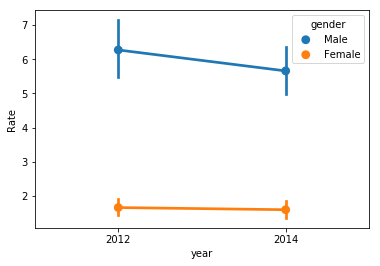

In [545]:
sns.pointplot(x='year', y='Rate', data=df_melt[df_melt['gender'] != 'All'], hue='gender')

### Problem 2
<span  style="color:green; font-size:16px">Tidy the dataset **`tidy/store_transactions.csv`**.</span>

In [688]:
st = pd.read_csv('../data/tidy/store_transactions.csv')
st

,store_number,store_address,customer_name,customer_join_date,customer_loyalty_number,transaction_id,product_name,product_price,quantity,transaction_time,transaction_bag_type
0,43,123 Fake St,John,5/3/2017,341,1,apple,0.50,10,1:45,paper
1,43,123 Fake St,John,5/3/2017,341,1,beef,5.99,3,1:45,paper
2,43,123 Fake St,John,5/3/2017,341,1,rice pudding,2.99,3,1:45,paper
3,43,123 Fake St,John,5/3/2017,341,1,milk,4.99,1,1:45,paper
4,22,55 Abbey Ln,Stephanie,2/2/1998,210,2,eggs,4.00,2,1:11,plastic
5,22,55 Abbey Ln,Stephanie,2/2/1998,210,2,apple,0.50,6,1:11,plastic
6,43,123 Fake St,Aria,6/6/2018,44,3,milk,4.99,3,3:44,paper
7,43,123 Fake St,Aria,6/6/2018,44,3,orange,0.99,3,3:44,paper
8,43,123 Fake St,Aria,6/6/2018,44,3,beef,5.99,1,3:44,paper
9,43,123 Fake St,Aria,6/6/2018,44,3,eggs,4.00,3,3:44,paper


### Problem 3
<span  style="color:green; font-size:16px">Use the **`pd.read_excel`** function to read the **`tidy/genetic_engineered.xlsx`** and tidy it (very difficult).</span>

In [648]:
df = pd.read_excel('../data/tidy/genetic_engineered.xls',header=1, skipfooter=21)
df

,,Insect-resistant (Bt) only,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Herbicide-tolerant only,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Illinois,13,12,18,23,26.0,25.0,24.0,19.0,13.0,10.0,15.0,14.0,14.0,4.0,3.0,1.0,2.0,3,3.0,3.0,4.0,5.0,6.0,12.0,15.0,15.0,15.0,15.0,17.0,18.0,7.0,5.0,4.0,4.0
3,Indiana,7,6,7,8,11.0,11.0,13.0,12.0,7.0,7.0,7.0,7.0,9.0,2.0,2.0,4.0,2.0,4,6.0,6.0,7.0,8.0,11.0,15.0,17.0,16.0,17.0,20.0,22.0,15.0,10.0,8.0,8.0,9.0
4,Iowa,23,25,31,33,36.0,35.0,32.0,22.0,16.0,14.0,15.0,13.0,12.0,5.0,4.0,5.0,3.0,5,6.0,7.0,8.0,10.0,14.0,14.0,19.0,15.0,15.0,14.0,16.0,15.0,14.0,8.0,8.0,9.0
5,Kansas,25,26,25,25,25.0,23.0,23.0,25.0,25.0,24.0,22.0,28.0,20.0,7.0,5.0,4.0,4.0,7,11.0,15.0,17.0,24.0,30.0,33.0,36.0,30.0,29.0,28.0,22.0,19.0,15.0,18.0,12.0,12.0
6,Michigan,8,8,12,18,15.0,15.0,16.0,19.0,15.0,13.0,11.0,11.0,8.0,4.0,2.0,2.0,3.0,4,7.0,8.0,14.0,14.0,20.0,18.0,22.0,24.0,20.0,25.0,24.0,26.0,15.0,15.0,16.0,18.0
7,Minnesota,28,25,29,31,35.0,33.0,28.0,26.0,19.0,23.0,18.0,16.0,19.0,3.0,2.0,2.0,3.0,7,7.0,11.0,15.0,17.0,22.0,29.0,32.0,29.0,24.0,28.0,29.0,22.0,10.0,10.0,13.0,10.0
8,Missouri,20,23,27,32,32.0,37.0,38.0,30.0,27.0,23.0,15.0,27.0,18.0,5.0,4.0,5.0,4.0,6,8.0,6.0,9.0,13.0,12.0,14.0,19.0,21.0,17.0,19.0,22.0,20.0,16.0,10.0,9.0,8.0
9,Nebraska,24,24,34,36,41.0,39.0,37.0,31.0,27.0,26.0,22.0,15.0,16.0,6.0,4.0,4.0,3.0,8,8.0,9.0,11.0,13.0,18.0,24.0,23.0,24.0,23.0,24.0,26.0,20.0,13.0,15.0,10.0,15.0


In [649]:
varieties = [df.columns[1], df.iloc[18, 1], df.columns[18], df.iloc[18, 18]]
varieties

['Insect-resistant (Bt) only                                           ',
 'Stacked gene varieties',
 'Herbicide-tolerant only                                           ',
 'All GE varieties 3/']

In [650]:
varieties[-1] = varieties[-1][:-3]
varieties = [var.strip() for var in varieties]
varieties

['Insect-resistant (Bt) only',
 'Stacked gene varieties',
 'Herbicide-tolerant only',
 'All GE varieties']

In [651]:
df.columns = df.iloc[0]
df.head()

,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
0,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2000,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Percent of all corn planted,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Illinois,13,12,18,23,26.0,25.0,24.0,19.0,13.0,10.0,15.0,14.0,14.0,4.0,3.0,1.0,2.0,3,3.0,3.0,4.0,5.0,6.0,12.0,15.0,15.0,15.0,15.0,17.0,18.0,7.0,5.0,4.0,4.0
3,Indiana,7,6,7,8,11.0,11.0,13.0,12.0,7.0,7.0,7.0,7.0,9.0,2.0,2.0,4.0,2.0,4,6.0,6.0,7.0,8.0,11.0,15.0,17.0,16.0,17.0,20.0,22.0,15.0,10.0,8.0,8.0,9.0
4,Iowa,23,25,31,33,36.0,35.0,32.0,22.0,16.0,14.0,15.0,13.0,12.0,5.0,4.0,5.0,3.0,5,6.0,7.0,8.0,10.0,14.0,14.0,19.0,15.0,15.0,14.0,16.0,15.0,14.0,8.0,8.0,9.0


In [665]:
df_left = df.iloc[:, :18]
df_left = df_left.drop(index=[0, 1, 17, 18, 19, 20])
df_left['State'] = df_left['State'].str.extract(r'([a-zA-z .]+)')
df_left['Variety'] = [varieties[0]] * 15 + [varieties[1]] * 15
df_left_melt = df_left.melt(['State', 'Variety'], var_name='Year', value_name='Percent')
df_left_melt['Year'] = df_left_melt['Year'].astype('int')
df_left_melt['Percent'] = pd.to_numeric(df_left_melt['Percent'], errors='coerce')
df_left_melt.head()

,State,Variety,Year,Percent
0,Illinois,Insect-resistant (Bt) only,2000,13.0
1,Indiana,Insect-resistant (Bt) only,2000,7.0
2,Iowa,Insect-resistant (Bt) only,2000,23.0
3,Kansas,Insect-resistant (Bt) only,2000,25.0
4,Michigan,Insect-resistant (Bt) only,2000,8.0


In [675]:
df_right = df.iloc[:, 18:]
df_right = df_right.drop(index=[0, 1, 17, 18, 19, 20])
df_right['State'] = df_left['State']
df_right['Variety'] = [varieties[2]] * 15 + [varieties[3]] * 15
df_right_melt = df_right.melt(['State', 'Variety'], var_name='Year', value_name='Percent')
df_right_melt['Year'] = df_right_melt['Year'].astype('int')
df_right_melt['Percent'] = pd.to_numeric(df_right_melt['Percent'], errors='coerce')
df_right_melt.head()

,State,Variety,Year,Percent
0,Illinois,Herbicide-tolerant only,2000,3.0
1,Indiana,Herbicide-tolerant only,2000,4.0
2,Iowa,Herbicide-tolerant only,2000,5.0
3,Kansas,Herbicide-tolerant only,2000,7.0
4,Michigan,Herbicide-tolerant only,2000,4.0


In [677]:
df_left.head()

,State,2000,2001,2002,2003,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,Variety
2,Illinois,13,12,18,23,26.0,25.0,24.0,19.0,13.0,10.0,15.0,14.0,14.0,4.0,3.0,1.0,2.0,Insect-resistant (Bt) only
3,Indiana,7,6,7,8,11.0,11.0,13.0,12.0,7.0,7.0,7.0,7.0,9.0,2.0,2.0,4.0,2.0,Insect-resistant (Bt) only
4,Iowa,23,25,31,33,36.0,35.0,32.0,22.0,16.0,14.0,15.0,13.0,12.0,5.0,4.0,5.0,3.0,Insect-resistant (Bt) only
5,Kansas,25,26,25,25,25.0,23.0,23.0,25.0,25.0,24.0,22.0,28.0,20.0,7.0,5.0,4.0,4.0,Insect-resistant (Bt) only
6,Michigan,8,8,12,18,15.0,15.0,16.0,19.0,15.0,13.0,11.0,11.0,8.0,4.0,2.0,2.0,3.0,Insect-resistant (Bt) only


In [679]:
df_final = pd.concat([df_left_melt, df_right_melt], ignore_index=True)
df_final.head()

,State,Variety,Year,Percent
0,Illinois,Insect-resistant (Bt) only,2000,13.0
1,Indiana,Insect-resistant (Bt) only,2000,7.0
2,Iowa,Insect-resistant (Bt) only,2000,23.0
3,Kansas,Insect-resistant (Bt) only,2000,25.0
4,Michigan,Insect-resistant (Bt) only,2000,8.0


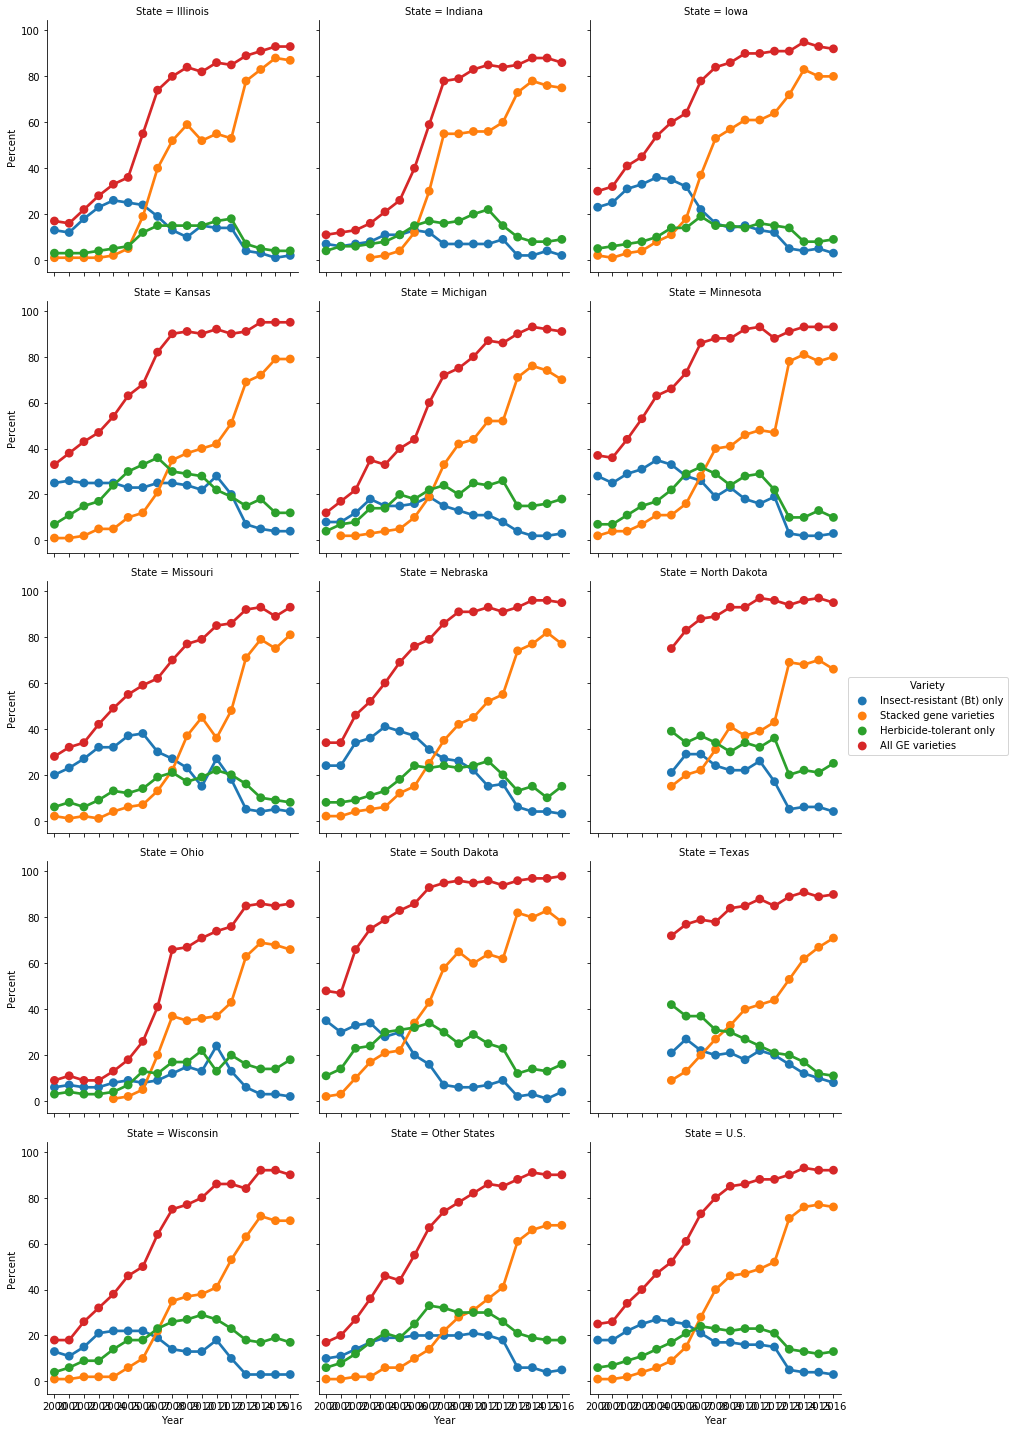

In [687]:
sns.factorplot(x='Year', 
               y='Percent', 
               hue='Variety',
               col='State',
               col_wrap=3,
               data=df_final, 
               ci=0)